In [27]:
import pandas as pd

file_path = "./magic+gamma+telescope/magic04.data" 
column_names = [
    "fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"
]
data = pd.read_csv(file_path, header=None, names=column_names)

print(data.head())

    fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g  


# EDA

In [28]:
print(f"Dataset Shape: {data.shape}")
print(data.info())
print(data.isnull().sum())

Dataset Shape: (19020, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fLength   19020 non-null  float64
 1   fWidth    19020 non-null  float64
 2   fSize     19020 non-null  float64
 3   fConc     19020 non-null  float64
 4   fConc1    19020 non-null  float64
 5   fAsym     19020 non-null  float64
 6   fM3Long   19020 non-null  float64
 7   fM3Trans  19020 non-null  float64
 8   fAlpha    19020 non-null  float64
 9   fDist     19020 non-null  float64
 10  class     19020 non-null  object 
dtypes: float64(10), object(1)
memory usage: 1.6+ MB
None
fLength     0
fWidth      0
fSize       0
fConc       0
fConc1      0
fAsym       0
fM3Long     0
fM3Trans    0
fAlpha      0
fDist       0
class       0
dtype: int64


/tmp/ipykernel_27491/3052437835.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_distribution.index, y=class_distribution.values, palette="viridis")


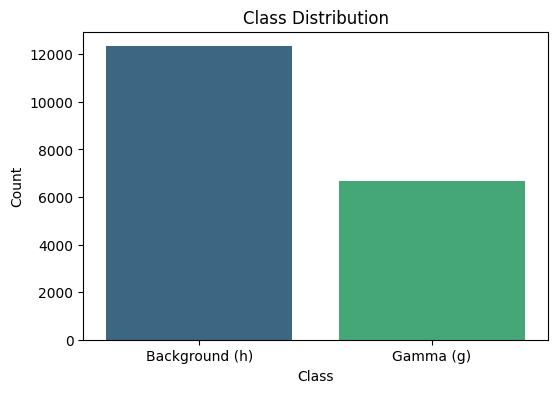

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

class_distribution = data['class'].value_counts()

plt.figure(figsize=(6, 4))
sns.barplot(x=class_distribution.index, y=class_distribution.values, palette="viridis")
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=["Background (h)", "Gamma (g)"])
plt.show()

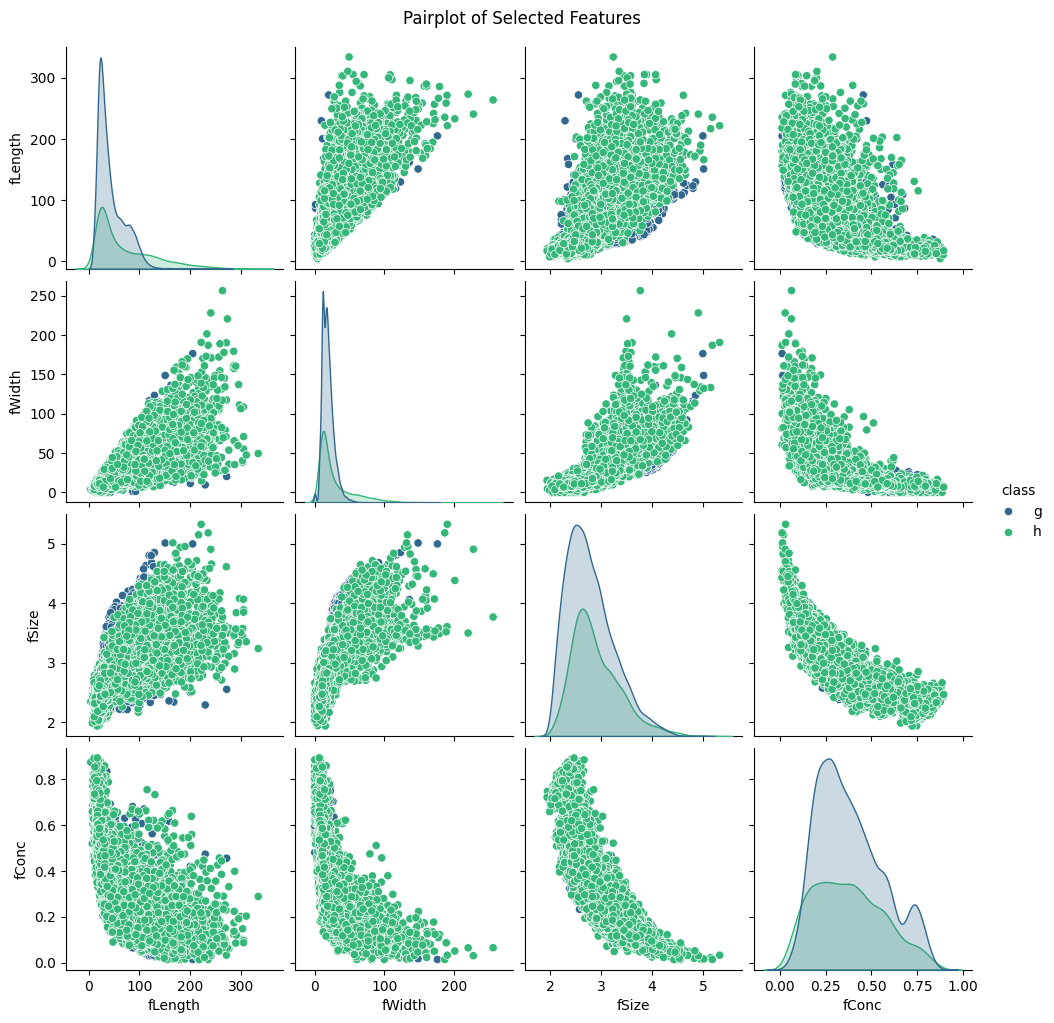

In [30]:
subset_features = ["fLength", "fWidth", "fSize", "fConc", "class"]
sns.pairplot(data[subset_features], hue="class", palette="viridis", diag_kind="kde")
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()

# Prediction

In [31]:
from sklearn.model_selection import train_test_split

data['class'] = data['class'].map({'g': 1, 'h': 0})

X = data.drop('class', axis=1)
y = data['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [32]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [33]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Accuracy: 0.7275
Confusion Matrix:
[[ 741 1260]
 [ 295 3410]]
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.37      0.49      2001
           1       0.73      0.92      0.81      3705

    accuracy                           0.73      5706
   macro avg       0.72      0.65      0.65      5706
weighted avg       0.72      0.73      0.70      5706

